In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import requests
import time
from collections import Counter
import shutil

In [2]:
sys.path.append(os.path.abspath("C:/Users/calvotello/Dropbox/MTB/Göttingen/research/"))
sys.path.append(os.path.abspath("./../../"))


In [3]:
from librarian_robot import downloading_datasets, map_classications_systems, tokenize



In [4]:

df = pd.read_parquet("./../../library_classification_rom_priv_data/1980_2019_data_labels_sample_tokenized.parquet")




In [5]:
df

,medium,title,title_supplement,year,entry_first,author_first_name,author_last_name,author_gnd_id,editor_first_name,editor_last_name,...,74.17@BK_notation,74.15@BK_notation,74.03@BK_notation,73.99@BK_notation,43.63@BK_notation,73.89@BK_notation,43.02@BK_notation,title_tokenized,joined_column_tokenized,publisher_tokenized
727067974,Aau,Glossario arabo-italiano (lingua moderna),None,1980,3496:09-10-12,Giovanni,Canova,None,None,None,...,0,0,0,0,0,0,0,gl|##ossa|##rio|arabo|-|italiano|(|lingua|mode...,arabisch|||italienisch,[|s|.|n|.|]
723420874,Oax,History in the Text 'Quatrevingt-Treize' and t...,None,1980,2045:31-08-12,Sandy,Petrey,None,None,None,...,0,0,0,0,0,0,0,history|in|the|text|'|quatre|##ving|##t|-|trei...,"the|title|of|this|study|""|history|in|the|text|...",john|benjamin|##s|publishing|company
723395780,Oax,Italic and Romance,Linguistic studies in honor of Ernst Pulgram,1980,2045:31-08-12,Herbert J.,Izzo,None,None,None,...,0,0,0,0,0,0,0,itali|##c|and|romance,linguistic|studies|in|honor|of|ernst|pul|##gra...,john|benjamin|##s|publishing|company
607035692,Aau,Din stihurile jupînului François Villon,None,1980,0001:17-08-09,François,Villon,079415202,Alexandru|Romulus|Val,Alexianu|Vulpescu|Munteanu,...,0,0,0,0,0,0,0,din|sti|##hur|##ile|ju|##pin|##ului|francois|v...,ubersetzung|||rum|##anis|##ch|||ly|##rik,ed|.|univers|||arta|grafica|[|druck|##er|]
388767014,Aau,The @horror of life,None,1980,3054:11-06-04,Roger L.,Williams,1233577956,Roger Lawrence,Williams,...,0,0,0,0,0,0,0,the|@|horror|of|life,sonst|##ige|||franzosisch|||literatur|||pes|##...,wei|##den|##feld|&|nicolson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644730073,Aau,Soluzioni,a practical grammar of contemporary Italian,2019,KNUB:23-11-18,Denise,De Rôme,None,None,None,...,0,0,0,0,0,0,0,sol|##uzioni,a|practical|grammar|of|contemporary|italian|||...,"routledge|,|taylor|&|francis|group"
1644599279,Aau,Les @grammairiens italiens face à leur langue ...,None,2019,KNUB:22-11-18,Laurent,Vallance,1680803417,None,None,...,0,0,0,0,0,0,0,les|@|gram|##mai|##rien|##s|italiens|face|a|le...,bei|##he|##fte|zur|zeitschrift|fur|romani|##sc...,de|gruyter
1644542471,Aau,Romance phonetics and phonology,None,2019,KNUB:21-11-18,None,None,None,Mark|Juana,Gibson|Gil Fernández,...,0,0,0,0,0,0,0,romance|phone|##tics|and|pho|##nol|##ogy,pho|##nologie|||romani|##sche|sprachen|||phone...,oxford|university|press
1643642936,Aau,Nationale Identitätskonstruktionen in Argentinien,Pressediskurse in Zeiten der Krise,2019,MAUB:25-10-18,Simone Maria,Mwangi,1663308705,None,None,...,0,0,0,0,0,0,0,nationale|identitat|##sko|##nst|##ruk|##tionen...,presse|##disk|##urs|##e|in|zeiten|der|krise|||...,de|gruyter


# Extract Tokens

In [6]:
tokenize.tokenize_column?

Signature:
tokenize.tokenize_column(
    df,
    column_name,
    add_name_of_original_column=True,
    reg_ex='(?u)\\b[\\w_@]+\\b|[¶\\(»\\]\\?\\.\\–\\!’•\\|“\\>\\)\\-\\—\\:\\}\\*\\&…¿\\/=¡\\"\\\'·+\\{\\#\\[;\xad,«~]',
    sort_columns_by_frequency=True,
    lowercase=True,
    max_features=100,
    analyzer='word',
    ngram_range=(1, 1),
    binary=False,
    strip_columns=False,
    delete_repited_columns=False,
    threshold_length_features=None,
    vocabulary=None,
)
Docstring:
Regex for BK classes: reg_ex = r"(?u)\d\d\.\d\d"
Regex for BERT tokens: reg_ex = [^\| ]+
File:      c:\users\calvotello\dropbox\mtb\göttingen\research\librarian_robot\tokenize.py
Type:      function


In [7]:
tokens_titles_df = tokenize.tokenize_column(df, "title_tokenized", reg_ex = r"[^\| ]+", max_features = 5000)


Shape of tokens:  (366143, 5000)
Shape of tokens after filtering:  (366143, 5000)


In [8]:
tokens_titles_df

,@@title_tokenized,de@title_tokenized,la@title_tokenized,'@title_tokenized,##s@title_tokenized,-@title_tokenized,",@title_tokenized",l@title_tokenized,le@title_tokenized,et@title_tokenized,...,europaische@title_tokenized,##ps@title_tokenized,ate@title_tokenized,oli@title_tokenized,##figur@title_tokenized,role@title_tokenized,giac@title_tokenized,##nant@title_tokenized,arena@title_tokenized,##raphie@title_tokenized
727067974,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
723420874,0,0,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
723395780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607035692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
388767014,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644730073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1644599279,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1644542471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1643642936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
tokens_titles_df.to_parquet("./../../library_classification_rom_priv_data/tokens_title_1980_2019_5000.parquet")

In [11]:
tokens_joined_column_df = tokenize.tokenize_column(df, "joined_column_tokenized", reg_ex = r"[^\| ]+", max_features = 5000)


MemoryError: Unable to allocate 13.6 GiB for an array with shape (366143, 5000) and data type int64

In [ ]:
tokens_joined_column_df

,-@joint_column_tokenized,",@joint_column_tokenized",.@joint_column_tokenized,the@joint_column_tokenized,und@joint_column_tokenized,##s@joint_column_tokenized,and@joint_column_tokenized,of@joint_column_tokenized,in@joint_column_tokenized,der@joint_column_tokenized,...,##fte@joint_column_tokenized,journey@joint_column_tokenized,##kte@joint_column_tokenized,##idu@joint_column_tokenized,breite@joint_column_tokenized,aims@joint_column_tokenized,things@joint_column_tokenized,##gent@joint_column_tokenized,##liti@joint_column_tokenized,animals@joint_column_tokenized
324826001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
832357286,24,24,7,19,0,1,19,14,13,0,...,0,0,0,0,0,0,0,0,0,0
620877359,0,0,0,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
506374440,2,5,7,0,3,5,0,0,1,4,...,0,0,0,0,0,0,0,0,0,0
873575733,2,10,6,0,8,1,0,0,4,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002020727,0,5,2,1,0,2,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
519527771,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
538234148,4,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493805125,0,5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tokens_joined_column_df.to_parquet("./../../library_classification_rom_priv_data/tokens_joined_column_1980_2019_5000.parquet")

In [ ]:
tokens_joined_column_df

,-@joint_column_tokenized,",@joint_column_tokenized",.@joint_column_tokenized,the@joint_column_tokenized,und@joint_column_tokenized,##s@joint_column_tokenized,and@joint_column_tokenized,of@joint_column_tokenized,in@joint_column_tokenized,der@joint_column_tokenized,...,##fte@joint_column_tokenized,journey@joint_column_tokenized,##kte@joint_column_tokenized,##idu@joint_column_tokenized,breite@joint_column_tokenized,aims@joint_column_tokenized,things@joint_column_tokenized,##gent@joint_column_tokenized,##liti@joint_column_tokenized,animals@joint_column_tokenized
324826001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
832357286,24,24,7,19,0,1,19,14,13,0,...,0,0,0,0,0,0,0,0,0,0
620877359,0,0,0,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
506374440,2,5,7,0,3,5,0,0,1,4,...,0,0,0,0,0,0,0,0,0,0
873575733,2,10,6,0,8,1,0,0,4,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002020727,0,5,2,1,0,2,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
519527771,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
538234148,4,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493805125,0,5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tokens_publisher_df = tokenize.tokenize_column(df, "publisher_tokenized", reg_ex = r"[^\| ]+", max_features = 5000)


Shape of tokens:  (100000, 5000)
Shape of tokens after filtering:  (100000, 5000)


In [ ]:
tokens_publisher_df

,.@publisher_tokenized,-@publisher_tokenized,press@publisher_tokenized,",@publisher_tokenized",##l@publisher_tokenized,verlag@publisher_tokenized,ver@publisher_tokenized,springer@publisher_tokenized,##s@publisher_tokenized,fur@publisher_tokenized,...,droit@publisher_tokenized,eden@publisher_tokenized,edicoes@publisher_tokenized,edita@publisher_tokenized,ehemaligen@publisher_tokenized,elektrische@publisher_tokenized,elleni@publisher_tokenized,##wein@publisher_tokenized,elt@publisher_tokenized,##bul@publisher_tokenized
324826001,0,1,0,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
832357286,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
620877359,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
506374440,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
873575733,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002020727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
519527771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538234148,2,2,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493805125,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tokens_publisher_df.to_parquet("./../../library_classification_rom_priv_data/tokens_publisher_balanced_1980_2019_5000.parquet")

In [ ]:
#df = pd.read_parquet("./../data/2020_data_balanced_with_labels.parquet")




In [ ]:
df

,medium,title,title_supplement,year,entry_first,author_first_name,author_last_name,author_gnd_id,editor_first_name,editor_last_name,...,05.16@BK_notation,85.53@BK_notation,55.52@BK_notation,85.34@BK_notation,01.03@BK_notation,01.01@BK_notation,33.48@BK_notation,title_tokenized,joint_column_tokenized,publisher_tokenized
324826001,Abv,Medienbrief,None,1994,2004:12-02-01,None,None,None,None,None,...,0,0,0,0,0,0,0,medien|##bri|##ef,,"lv|##r|-|zentrum|fur|medien|und|bildung|,|medi..."
832357286,Aau,Just ordinary citizens?,towards a comparative portrait of the politica...,2016,3283:30-07-15,None,None,None,Antoine,Bilodeau,...,0,0,0,0,0,0,0,just|ordinary|citizens|?,towards|a|comparative|portrait|of|the|politica...,university|of|toronto|press
620877359,Aau,Immunocytochemical methods and protocols,None,2010,8112:11-03-10,None,None,None,Constance|Maria Célia,Oliver|Jamur,...,0,0,0,0,0,0,0,im|##mun|##oc|##yt|##oche|##mica|##l|methods|a...,methods|in|molecular|biology|||springer|protoc...,humana|press
506374440,Oau,Cerebral mechanismus underlying the automatic ...,None,2005,0027:26-01-06,Daniela,Simon,707588197,None,None,...,0,0,0,0,0,0,0,cerebral|mechanism|##us|underlying|the|automat...,gesicht|##sa|##us|##druck|##e|uber|##mitteln|w...,
873575733,Aau,Praxisbuch Ethik in der Intensivmedizin,konkrete Entscheidungshilfen in Grenzsituationen,2018,2001:30-11-16,None,None,None,Fred|Thomas M.|Dorothee|Ines|Gerhard|Michael|J...,Salomon|Berger|Dörr|Eckmaier|Ehninger|Gommel|Graf,...,0,0,0,0,0,0,0,praxis|##buch|eth|##ik|in|der|intensiv|##med|#...,kon|##kret|##e|entscheidung|##shi|##lf|##en|in...,medizin|##isch|wissenschaftliche|verlag|##sges...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002020727,Ozu,Magyar Irodalomtudományi Intézet,None,2015,0007:26-10-17,None,None,None,None,None,...,0,0,0,0,0,0,0,magyar|irodalom|##tudo|##manyi|intezet,"university|departments|;|sf|##1|||""|hungarian|...",
519527771,Aau,Savage kingdom,Virginia and the founding of English America,2007,2002:01-11-06,Benjamin,Woolley,488055997,None,None,...,0,0,0,0,0,0,0,savage|kingdom,virginia|and|the|founding|of|english|america,harper|##press
538234148,Aau,Die @dingliche Sicherung von EEG-Anlagen,None,2007,2001:25-07-07,Steffen,Schöfer,None,Thomas,Schomerus,...,0,0,0,0,0,0,0,die|@|ding|##liche|sicher|##ung|von|ee|##g|-|a...,luneburg|##er|schriften|zum|wirtschaft|##srech...,nom|##os|-|ver|##l|.|-|ges|.
493805125,Aau,"Husserl et la naissance de la phénoménologie, ...","des ""recherches logiques"" aux ""ideen"", la genè...",2005,0001:26-07-05,Jean-François,Lavigne,705575608,None,None,...,0,0,0,0,0,0,0,hus|##ser|##l|et|la|naissance|de|la|phe|##nome...,"des|""|recherches|logique|##s|""|aux|""|ideen|""|,...",presses|univ|.|de|france


In [ ]:
df[["language_text"]]

,language_text
324826001,ger
832357286,eng
620877359,eng
506374440,eng
873575733,ger
...,...
1002020727,eng|rum|hun
519527771,eng
538234148,ger
493805125,fre


In [ ]:
languages_df = tokenize.tokenize_column(df, "language_text",  ngram_range=(1,1), analyzer="word",  reg_ex='(?u)\\b\\w+\\b', max_features = 1000, add_name_of_original_column = True)

Shape of tokens:  (100000, 229)
Shape of tokens after filtering:  (100000, 229)


In [ ]:
languages_df

,ger@language_text,eng@language_text,fre@language_text,ita@language_text,rus@language_text,spa@language_text,lat@language_text,ara@language_text,pol@language_text,tur@language_text,...,non@language_text,myv@language_text,fij@language_text,new@language_text,fiu@language_text,nep@language_text,frm@language_text,nav@language_text,gem@language_text,abk@language_text
324826001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
832357286,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
620877359,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
506374440,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
873575733,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002020727,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
519527771,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538234148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493805125,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


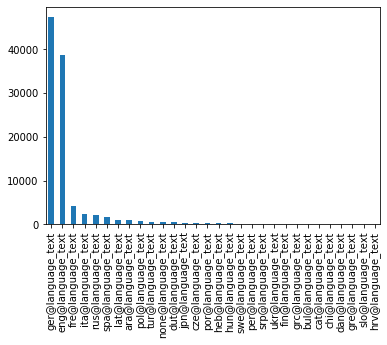

In [ ]:
languages_df.sum().iloc[0:30].plot.bar()

In [ ]:
df = pd.merge(df, languages_df, left_index= True, right_index= True)

In [ ]:
df

,medium,title,title_supplement,year,entry_first,author_first_name,author_last_name,author_gnd_id,editor_first_name,editor_last_name,...,non@language_text,myv@language_text,fij@language_text,new@language_text,fiu@language_text,nep@language_text,frm@language_text,nav@language_text,gem@language_text,abk@language_text
324826001,Abv,Medienbrief,None,1994,2004:12-02-01,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
832357286,Aau,Just ordinary citizens?,towards a comparative portrait of the politica...,2016,3283:30-07-15,None,None,None,Antoine,Bilodeau,...,0,0,0,0,0,0,0,0,0,0
620877359,Aau,Immunocytochemical methods and protocols,None,2010,8112:11-03-10,None,None,None,Constance|Maria Célia,Oliver|Jamur,...,0,0,0,0,0,0,0,0,0,0
506374440,Oau,Cerebral mechanismus underlying the automatic ...,None,2005,0027:26-01-06,Daniela,Simon,707588197,None,None,...,0,0,0,0,0,0,0,0,0,0
873575733,Aau,Praxisbuch Ethik in der Intensivmedizin,konkrete Entscheidungshilfen in Grenzsituationen,2018,2001:30-11-16,None,None,None,Fred|Thomas M.|Dorothee|Ines|Gerhard|Michael|J...,Salomon|Berger|Dörr|Eckmaier|Ehninger|Gommel|Graf,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002020727,Ozu,Magyar Irodalomtudományi Intézet,None,2015,0007:26-10-17,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
519527771,Aau,Savage kingdom,Virginia and the founding of English America,2007,2002:01-11-06,Benjamin,Woolley,488055997,None,None,...,0,0,0,0,0,0,0,0,0,0
538234148,Aau,Die @dingliche Sicherung von EEG-Anlagen,None,2007,2001:25-07-07,Steffen,Schöfer,None,Thomas,Schomerus,...,0,0,0,0,0,0,0,0,0,0
493805125,Aau,"Husserl et la naissance de la phénoménologie, ...","des ""recherches logiques"" aux ""ideen"", la genè...",2005,0001:26-07-05,Jean-François,Lavigne,705575608,None,None,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

df.to_parquet("./../../library_classification_rom_priv_data/1980_2019_data_labels_sample_tokenized_languages.parquet")




In [ ]:
tokens_joined_df = tokens_titles_df

In [ ]:

tokens_joined_df = pd.merge(tokens_joined_df, languages_df, right_index=True, left_index=True)

In [ ]:
tokens_joined_df

,-@title_tokenized,@@title_tokenized,in@title_tokenized,und@title_tokenized,",@title_tokenized",##s@title_tokenized,and@title_tokenized,der@title_tokenized,the@title_tokenized,of@title_tokenized,...,non@language_text,myv@language_text,fij@language_text,new@language_text,fiu@language_text,nep@language_text,frm@language_text,nav@language_text,gem@language_text,abk@language_text
324826001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
832357286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
620877359,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
506374440,0,0,0,0,0,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
873575733,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002020727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
519527771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538234148,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493805125,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

tokens_joined_df = pd.merge(tokens_joined_df, tokens_joint_column_df, right_index=True, left_index=True)

In [ ]:
del tokens_joint_column_df

In [ ]:
del tokens_titles_df

In [ ]:
del df

In [ ]:

tokens_joined_df = pd.merge(tokens_joined_df, tokens_publisher_df, right_index=True, left_index=True)

In [ ]:
tokens_joined_df

,-@title_tokenized,@@title_tokenized,in@title_tokenized,und@title_tokenized,",@title_tokenized",##s@title_tokenized,and@title_tokenized,der@title_tokenized,the@title_tokenized,of@title_tokenized,...,droit@publisher_tokenized,eden@publisher_tokenized,edicoes@publisher_tokenized,edita@publisher_tokenized,ehemaligen@publisher_tokenized,elektrische@publisher_tokenized,elleni@publisher_tokenized,##wein@publisher_tokenized,elt@publisher_tokenized,##bul@publisher_tokenized
324826001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
832357286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
620877359,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
506374440,0,0,0,0,0,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
873575733,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002020727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
519527771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538234148,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493805125,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
del tokens_publisher_df

In [ ]:
del languages_df

In [ ]:
tokens_joined_df.to_parquet("./../../library_classification_rom_priv_data/tokens_joined_1980_2019_sample.parquet")

In [4]:
tokens_joined_df = pd.read_parquet("./../data/tokens_joined_2005_2019_sample.parquet")

In [ ]:
tokens_joined_df = tokens_joined_df.astype(bool).astype(int)

In [ ]:
tokens_joined_df.to_parquet("./../../data/tokens_joined_binary_1980_2019_sample.parquet")